In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('marksheet.csv')
print(df.head())

   id     Name  Gender  Age Section  Science  English  History  Maths
0   1  Bronnie  Female   13       C       21       81       62     49
1   2   Lemmie    Male   15       B       29       41       17     40
2   3    Danya  Female   14       C       12       87       16     96
3   4    Denna  Female   14       B       15       53       82     33
4   5  Jocelin    Male   14       A       43        6        3     21


In [60]:
df.describe()

,id,Age,Science,English,History,Maths
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,14.020000,51.440000,47.980000,52.272000,53.016000
std,72.312977,0.823598,29.314497,29.949013,26.868526,27.386416
min,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000
25%,63.250000,13.000000,25.250000,20.250000,31.000000,30.000000
50%,125.500000,14.000000,53.000000,47.500000,53.000000,52.500000
75%,187.750000,15.000000,78.000000,74.000000,76.000000,76.000000
max,250.000000,15.000000,100.000000,100.000000,100.000000,100.000000


In [61]:
# calculate total marks for each student
df['Total'] = df[['Maths', 'Science', 'English', 'History']].sum(axis=1)

In [62]:
def percentage_label(p):
    if p >= 91: return "C1"
    elif p >= 81: return "C2"
    elif p >= 71: return "C3"
    elif p >= 61: return "C4"
    elif p >= 50: return "C5"
    else: return "F"
    
def percentile_label(p):
    if p >= 91: return "P1"
    elif p >= 81: return "P2"
    elif p >= 71: return "P3"
    elif p >= 61: return "P4"
    elif p >= 50: return "P5"
    else: return "F"
    
def grade_system(p):
    if p >= 91: return "O"
    elif p >= 85: return "A+"
    elif p >= 75: return "A"
    elif p >= 65: return "B+"
    elif p >= 60: return "B"
    elif p >= 55: return "C"
    elif p >= 50: return "P"
    else: return "F"
    
def calculate_percentile(total, n):
    count = len(df[df['Total'] < total])
    percentile = (count / n) * 100
    return percentile


In [63]:
df['percentage'] = (df['Total'] / 400) * 100
df['percentage_label'] = df['percentage'].apply(percentage_label)
n_students = len(df)
df['percentile'] = df['Total'].apply(lambda x: calculate_percentile(x, n_students))
df['percentile_label'] = df['percentile'].apply(percentile_label)
df['grade'] = df['percentage'].apply(grade_system)

# ranking students
df['Rank_percentage'] = df['percentage'].rank(ascending=False).astype(int)
df['Rank_total'] = df['Total'].rank(ascending=False).astype(int)
df['Rank_percentile'] = df['percentile'].rank(ascending=False).astype(int)

print(df[[
    'id', 
    'percentage', 
    'percentile', 
    'grade', 
    'Rank_percentage', 
    'Rank_percentile'
]].sort_values('Rank_percentage').head(10))

      id  percentage  percentile grade  Rank_percentage  Rank_percentile
10    11       90.25        99.6    A+                1                1
120  121       89.00        99.2    A+                2                2
68    69       86.75        98.8    A+                3                3
91    92       85.25        98.4    A+                4                4
200  201       83.25        98.0     A                5                5
150  151       80.00        97.2     A                6                6
178  179       80.00        97.2     A                6                6
39    40       79.25        96.8     A                8                8
222  223       77.75        96.4     A                9                9
5      6       77.50        96.0     A               10               10


In [64]:
grade_df = df[['Maths', 'Science', 'English', 'History', 'grade']].copy()
percentagre_df = df[['Maths', 'Science', 'English', 'History', 'percentage_label']].copy()
percentile_df = df[['Maths', 'Science', 'English', 'History', 'percentile_label']].copy()

# triain for predicting grade based on marks
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = grade_df[['Maths', 'Science', 'English', 'History']]
y = grade_df['grade']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report for Grade Prediction:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix for Grade Prediction:")
print(confusion_matrix(y_test, y_pred))

# train for predicting percentage label based on marks
X = percentagre_df[['Maths', 'Science', 'English', 'History']]
y = percentagre_df['percentage_label']
le = LabelEncoder()
y = le.fit_transform(y)

X_train_percentage, X_test_percentage, y_train_percentage, y_test_percentage = train_test_split(X, y, test_size=0.2, random_state=42)
clf1 = DecisionTreeClassifier()
clf1.fit(X_train_percentage, y_train_percentage)
y_pred = clf1.predict(X_test_percentage)
print("Classification Report for Percentage Label Prediction:")
print(classification_report(y_test_percentage, y_pred, target_names=le.classes_))
print("Confusion Matrix for Percentage Label Prediction:")
print(confusion_matrix(y_test_percentage, y_pred))

# train for predicting percentile label based on marks
X = percentile_df[['Maths', 'Science', 'English', 'History']]
y = percentile_df['percentile_label']
le = LabelEncoder()
y = le.fit_transform(y)

X_train_percentile, X_test_percentile, y_train_percentile, y_test_percentile = train_test_split(X, y, test_size=0.2, random_state=42)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_percentile, y_train_percentile)
y_pred = clf2.predict(X_test_percentile)
print("Classification Report for Percentile Label Prediction:")
print(classification_report(y_test_percentile, y_pred, target_names=le.classes_))
print("Confusion Matrix for Percentile Label Prediction:")
print(confusion_matrix(y_test_percentile, y_pred))

# mix the tests for each model use it to predict using the test of the other models
y_pred_percentage = clf1.predict(X_test_percentile)
print("Classification Report for Percentage Label Prediction on Percentile Test Set:")
print(classification_report(y_test_percentile, y_pred_percentage, target_names=le.classes_))
print("Confusion Matrix for Percentage Label Prediction on Percentile Test Set:")
print(confusion_matrix(y_test_percentile, y_pred_percentage))
y_pred_percentile = clf2.predict(X_test_percentage)
print("Classification Report for Percentile Label Prediction on Percentage Test Set:")
print(classification_report(y_test_percentage, y_pred_percentile, target_names=le.classes_))
print("Confusion Matrix for Percentile Label Prediction on Percentage Test Set:")
print(confusion_matrix(y_test_percentage, y_pred_percentile))

Classification Report for Grade Prediction:
              precision    recall  f1-score   support

           A       0.40      0.67      0.50         3
          A+       0.00      0.00      0.00         3
           B       0.00      0.00      0.00         3
          B+       0.62      0.56      0.59         9
           C       0.29      0.33      0.31         6
           F       0.82      0.78      0.80        18
           P       0.38      0.38      0.38         8

    accuracy                           0.52        50
   macro avg       0.36      0.39      0.37        50
weighted avg       0.53      0.52      0.52        50

Confusion Matrix for Grade Prediction:
[[ 2  0  0  0  1  0  0]
 [ 1  0  0  2  0  0  0]
 [ 1  0  0  1  0  0  1]
 [ 1  0  2  5  1  0  0]
 [ 0  0  2  0  2  2  0]
 [ 0  0  0  0  0 14  4]
 [ 0  0  1  0  3  1  3]]
Classification Report for Percentage Label Prediction:
              precision    recall  f1-score   support

          C2       1.00      0.50      0.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

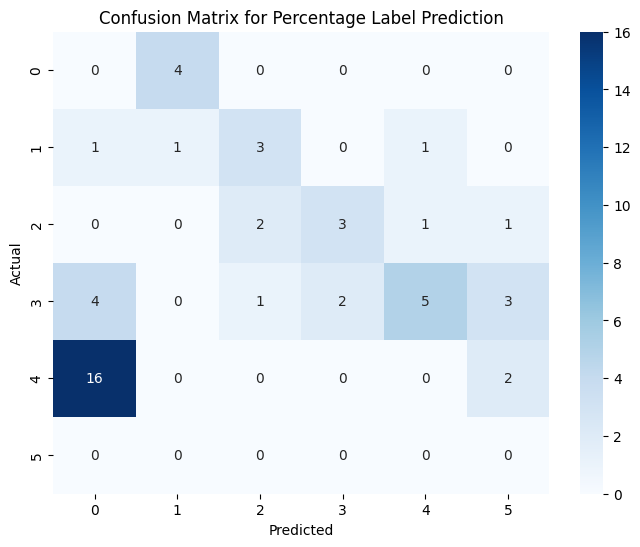

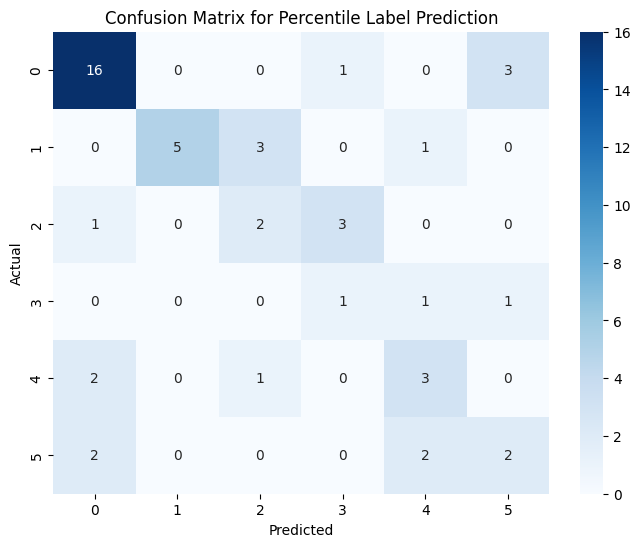

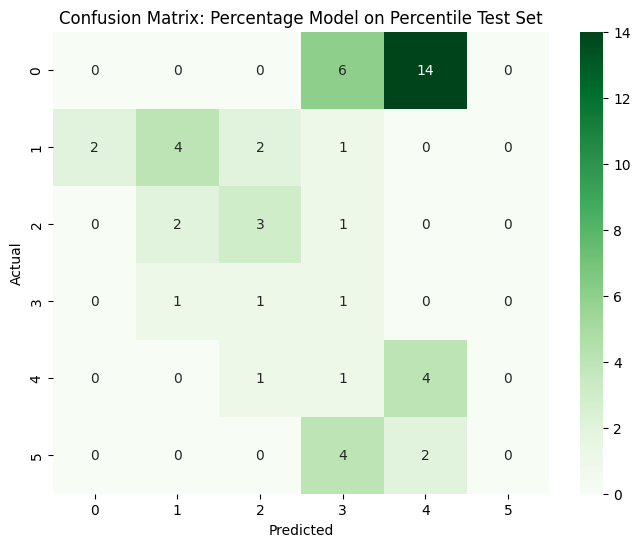

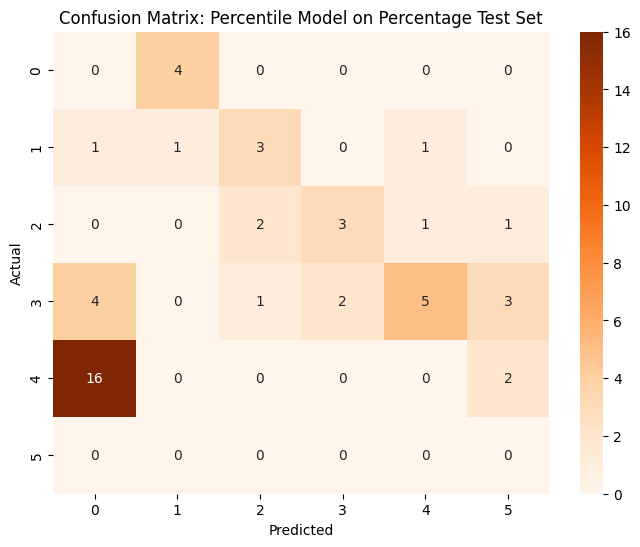

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize confusion matrix for Percentage Label Prediction
cm_percentage = confusion_matrix(y_test_percentage, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for Percentage Label Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualize confusion matrix for Percentile Label Prediction
cm_percentile = confusion_matrix(y_test_percentile, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentile, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for Percentile Label Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cross-test visualizations
cm_cross_1 = confusion_matrix(y_test_percentile, y_pred_percentage)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cross_1, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Confusion Matrix: Percentage Model on Percentile Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

cm_cross_2 = confusion_matrix(y_test_percentage, y_pred_percentile)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cross_2, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Confusion Matrix: Percentile Model on Percentage Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()